In [1]:
!pip install easyocr

In [2]:
!pip install imutils

In [3]:
import pandas as pd

In [6]:
df = pd.read_csv("C:/Users/Akshita Gupta/Downloads/ai-ml/State_codes.csv.xls")

In [7]:
import cv2
from matplotlib import pyplot as plt

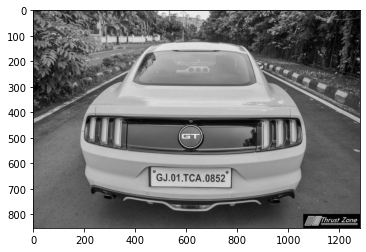

In [20]:
img = cv2.imread("C:/Users/Akshita Gupta/Downloads/ai-ml/img7.jpg")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB))

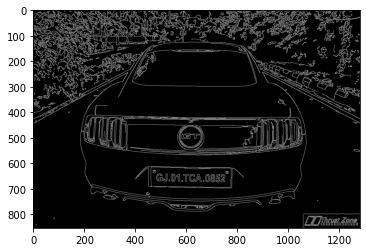

In [21]:
bfilter = cv2.bilateralFilter(gray, 11, 17, 17) 
edged = cv2.Canny(bfilter, 30, 200) 
plt.imshow(cv2.cvtColor(edged, cv2.COLOR_BGR2RGB))

In [22]:
import imutils

In [23]:
keypoints = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(keypoints)
contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10]

In [24]:
location = None
for contour in contours:
    approx = cv2.approxPolyDP(contour, 10, True)
    if len(approx) == 4:
        location = approx
        break
location

array([[[461, 617]],

       [[771, 618]],

       [[774, 691]],

       [[464, 689]]], dtype=int32)

In [25]:
import numpy as np

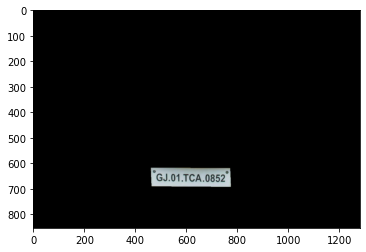

In [26]:
mask = np.zeros(gray.shape, np.uint8)
new_image = cv2.drawContours(mask, [location], 0,255, -1)
new_image = cv2.bitwise_and(img, img, mask=mask)
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))

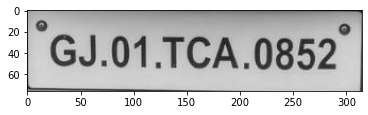

In [27]:
(x,y) = np.where(mask==255)
(x1, y1) = (np.min(x), np.min(y))
(x2, y2) = (np.max(x), np.max(y))
cropped_image = gray[x1:x2+2, y1:y2+2]
plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))

In [28]:
import easyocr

In [29]:
reader = easyocr.Reader(['en'])
result = reader.readtext(cropped_image)
final = result[0][-2].replace(".", " ")
final

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


'GJ O1 TCA 0852'

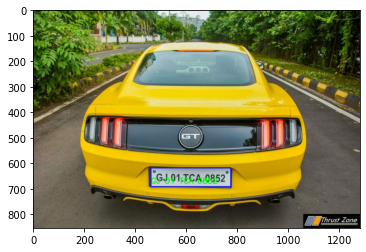

In [30]:
text = final
font = cv2.FONT_HERSHEY_SIMPLEX
res = cv2.putText(img, text=text, org=(approx[0][0][0], approx[1][0][1]+60), fontFace=font, fontScale=1, color=(0,255,0), thickness=2, lineType=cv2.LINE_AA)
res = cv2.rectangle(img, tuple(approx[0][0]), tuple(approx[2][0]), (221,25,32),3)
plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB))

In [31]:
state = df[df['Abbreviation']==text[0:2]]['State'].values[0]

In [32]:
with open('output7.txt', 'w') as f:
  f.write(f"License Plate Number: {text} \n")
  f.write(f"State of Registration: {state} \n")